In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import pandas as pd
import array as np

In [20]:
data= pd.read_csv('hmnist.csv')

In [21]:
x=data.drop('label',axis=1)
x= x.values
y= data['label']

In [30]:
num_unique_values_per_row = data.apply(lambda row: len(set(row)), axis=1)

# Print the number of unique values per row
print(num_unique_values_per_row)

0        140
1        202
2        133
3        215
4        185
        ... 
10010    159
10011    196
10012    164
10013     97
10014    148
Length: 10015, dtype: int64


In [34]:
print(x.shape)
print(y.shape)
type(x)

(10015, 2352)
(10015,)


numpy.ndarray

In [33]:
# Define dimensions
num_images = image_data.shape[0]
width = 28
height = 28
channels = 3

# Reshape the image data
reshaped_data = np.reshape(image_data, (num_images, width, height, channels))

print(reshaped_data.shape) 

(10015, 28, 28, 3)


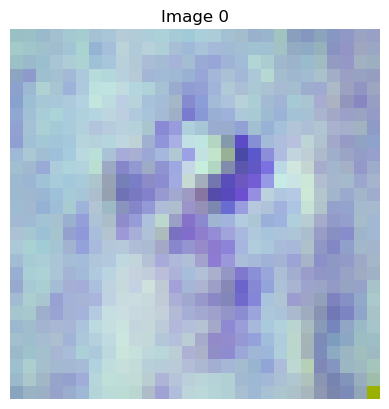

In [36]:
image_index = 0

# Extract the image data at the chosen index
image = reshaped_data[image_index]

# Display the image using Matplotlib
plt.imshow(image)
plt.title(f"Image {image_index}")
plt.axis('off')
plt.show()



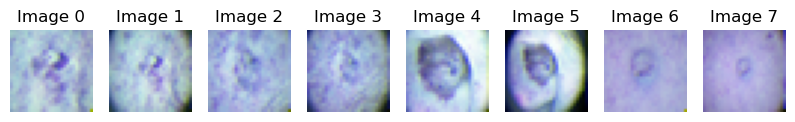

In [41]:
images=8
start_index=0
plt.figure(figsize=(10, 10))
for i in range (images):
    image=reshaped_data[start_index+i]
    plt.subplot(1, images, i + 1)
    plt.imshow(image)
    plt.title(f"Image {start_index + i}")
    plt.axis('off')

plt.show()






In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

# Transform the validation and testing data using the same scaler
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [59]:
model = Sequential([
        Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='softmax') 
])




In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [61]:
history = model.fit(x_train_scaled, y_train, epochs=100
                    , batch_size=64, validation_data=
                    (x_val_scaled, y_val))


Epoch 1/10
101/101 [==============================] - 2s 12ms/step - loss: -7883.7041 - accuracy: 0.0518 - val_loss: -34175.4570 - val_accuracy: 0.0555
Epoch 2/10
101/101 [==============================] - 1s 10ms/step - loss: -147457.4844 - accuracy: 0.0518 - val_loss: -332264.3125 - val_accuracy: 0.0555
Epoch 3/10
101/101 [==============================] - 2s 17ms/step - loss: -714239.7500 - accuracy: 0.0518 - val_loss: -1214674.3750 - val_accuracy: 0.0555
Epoch 4/10
101/101 [==============================] - 1s 12ms/step - loss: -2042392.5000 - accuracy: 0.0518 - val_loss: -2997165.0000 - val_accuracy: 0.0555
Epoch 5/10
101/101 [==============================] - 2s 21ms/step - loss: -4423349.5000 - accuracy: 0.0518 - val_loss: -5948314.5000 - val_accuracy: 0.0555
Epoch 6/10
101/101 [==============================] - 2s 21ms/step - loss: -8120693.5000 - accuracy: 0.0518 - val_loss: -10296586.0000 - val_accuracy: 0.0555
Epoch 7/10
101/101 [==============================] - 2s 16ms/ste

In [62]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

63/63 [==============================] - 0s 3ms/step - loss: -45741364.0000 - accuracy: 0.0464
Test Loss: -45741364.0000
Test Accuracy: 0.0464


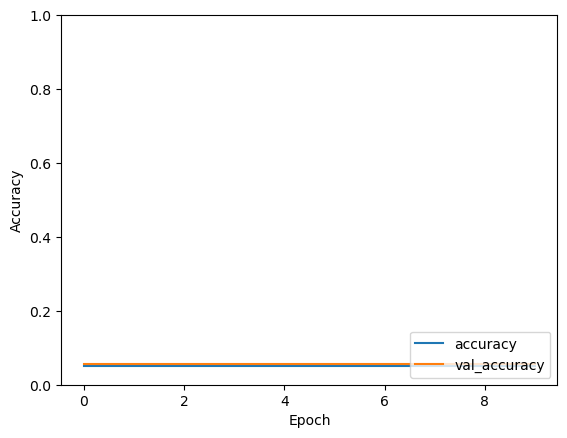

In [63]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
